In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
img = cv2.imread("/content/drive/MyDrive/Trim 5 Practicals/Computer Vision Practicals/Data/cat.jpg", 0)

In [17]:
fourier_trans = np.fft.fft2(img)

Text(0.5, 1.0, 'Fourier Transformation')

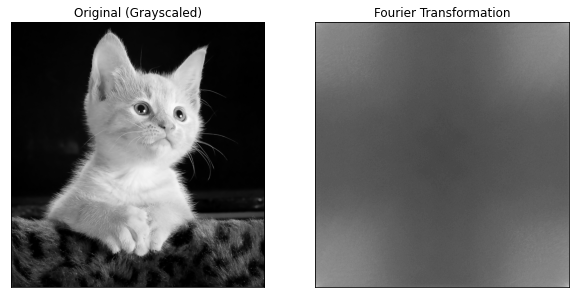

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original (Grayscaled)")

plt.subplot(122)
plt.imshow(np.log1p(np.abs(fourier_trans)), cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Fourier Transformation")

Text(0.5, 1.0, 'Fourier Shifted')

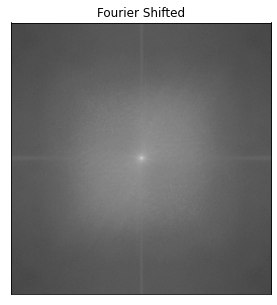

In [19]:
f_shift = np.fft.fftshift(fourier_trans)

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(f_shift)), cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Fourier Shifted")

In [30]:
def get_lpf(fourier_img, d0):
  M, N = fourier_img.shape
  low_pass_filter = np.zeros((M, N), dtype=np.float32)

  for u in range(M):
    for v in range(N):
      D = np.sqrt((u - (M / 2))**2 + (v - (N / 2))**2)

      if D <= d0:
        low_pass_filter[u, v] = 1
      else:
        low_pass_filter[u, v] = 0
    
  return low_pass_filter

Text(0.5, 1.0, 'Ideal Low Pass Filter D0 = 500')

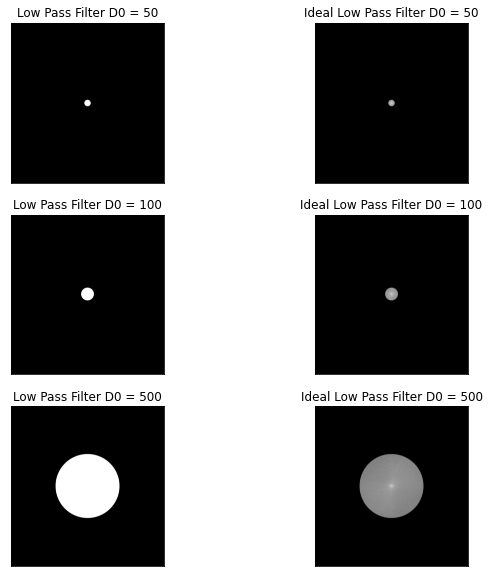

In [31]:
lpf_50 = get_lpf(fourier_trans, 50)
lpf_100 = get_lpf(fourier_trans, 100)
lpf_500 = get_lpf(fourier_trans, 500)

ideal_lpf_50 = f_shift * lpf_50
ideal_lpf_100 = f_shift * lpf_100
ideal_lpf_500 = f_shift * lpf_500

plt.figure(figsize=(10, 10))

plt.subplot(321)
plt.imshow(np.log1p(np.abs(lpf_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Low Pass Filter D0 = 50")

plt.subplot(322)
plt.imshow(np.log1p(np.abs(ideal_lpf_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal Low Pass Filter D0 = 50")

plt.subplot(323)
plt.imshow(np.log1p(np.abs(lpf_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Low Pass Filter D0 = 100")

plt.subplot(324)
plt.imshow(np.log1p(np.abs(ideal_lpf_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal Low Pass Filter D0 = 100")

plt.subplot(325)
plt.imshow(np.log1p(np.abs(lpf_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Low Pass Filter D0 = 500")

plt.subplot(326)
plt.imshow(np.log1p(np.abs(ideal_lpf_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal Low Pass Filter D0 = 500")

Text(0.5, 1.0, 'Inverse Transform D0 = 500')

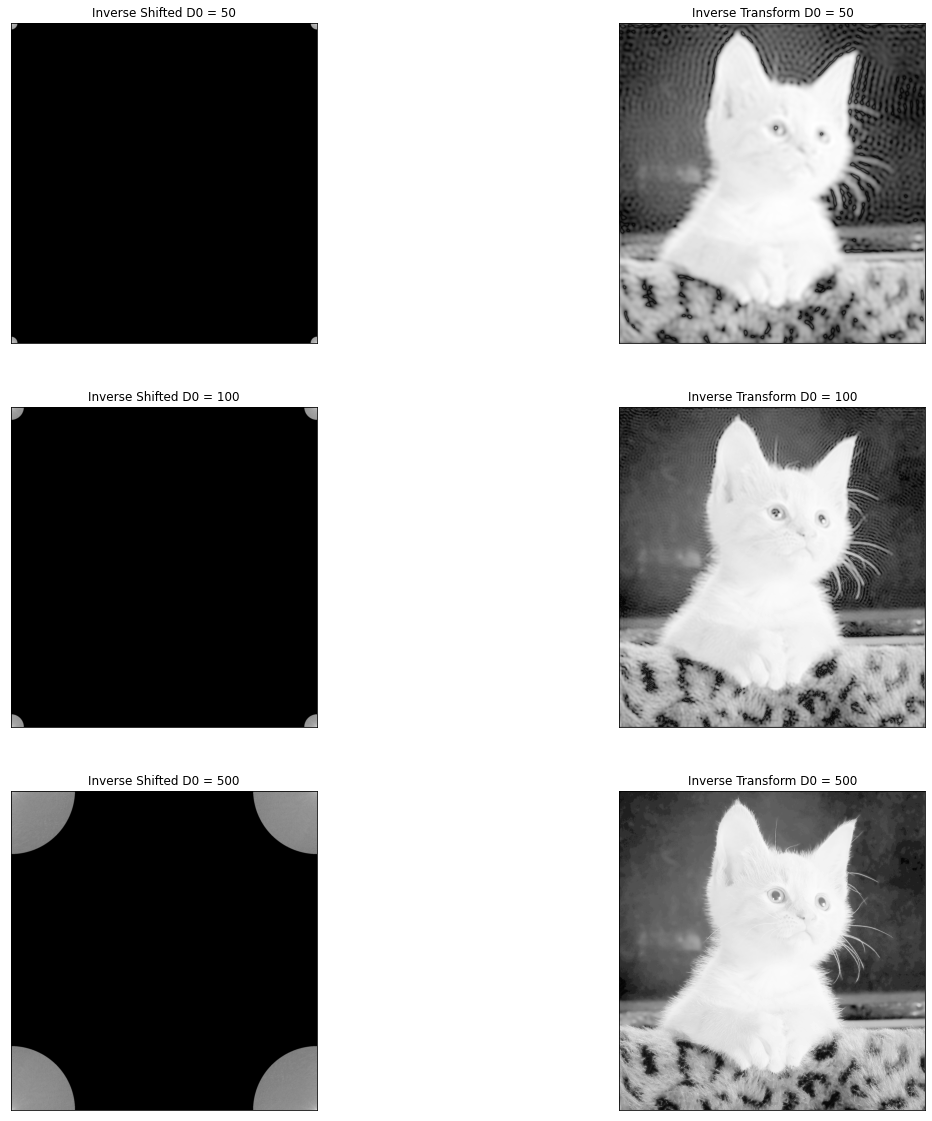

In [33]:
inv_shifted_50 = np.fft.ifftshift(ideal_lpf_50)
inv_fourier_50 = np.fft.ifft2(inv_shifted_50)
inv_shifted_100 = np.fft.ifftshift(ideal_lpf_100)
inv_fourier_100 = np.fft.ifft2(inv_shifted_100)
inv_shifted_500 = np.fft.ifftshift(ideal_lpf_500)
inv_fourier_500 = np.fft.ifft2(inv_shifted_500)

plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.imshow(np.log1p(np.abs(inv_shifted_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Shifted D0 = 50")

plt.subplot(322)
plt.imshow(np.log1p(np.abs(inv_fourier_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Transform D0 = 50")

plt.subplot(323)
plt.imshow(np.log1p(np.abs(inv_shifted_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Shifted D0 = 100")

plt.subplot(324)
plt.imshow(np.log1p(np.abs(inv_fourier_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Transform D0 = 100")

plt.subplot(325)
plt.imshow(np.log1p(np.abs(inv_shifted_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Shifted D0 = 500")

plt.subplot(326)
plt.imshow(np.log1p(np.abs(inv_fourier_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse Transform D0 = 500")

Text(0.5, 1.0, 'Ideal High Pass Filter D0 = 500')

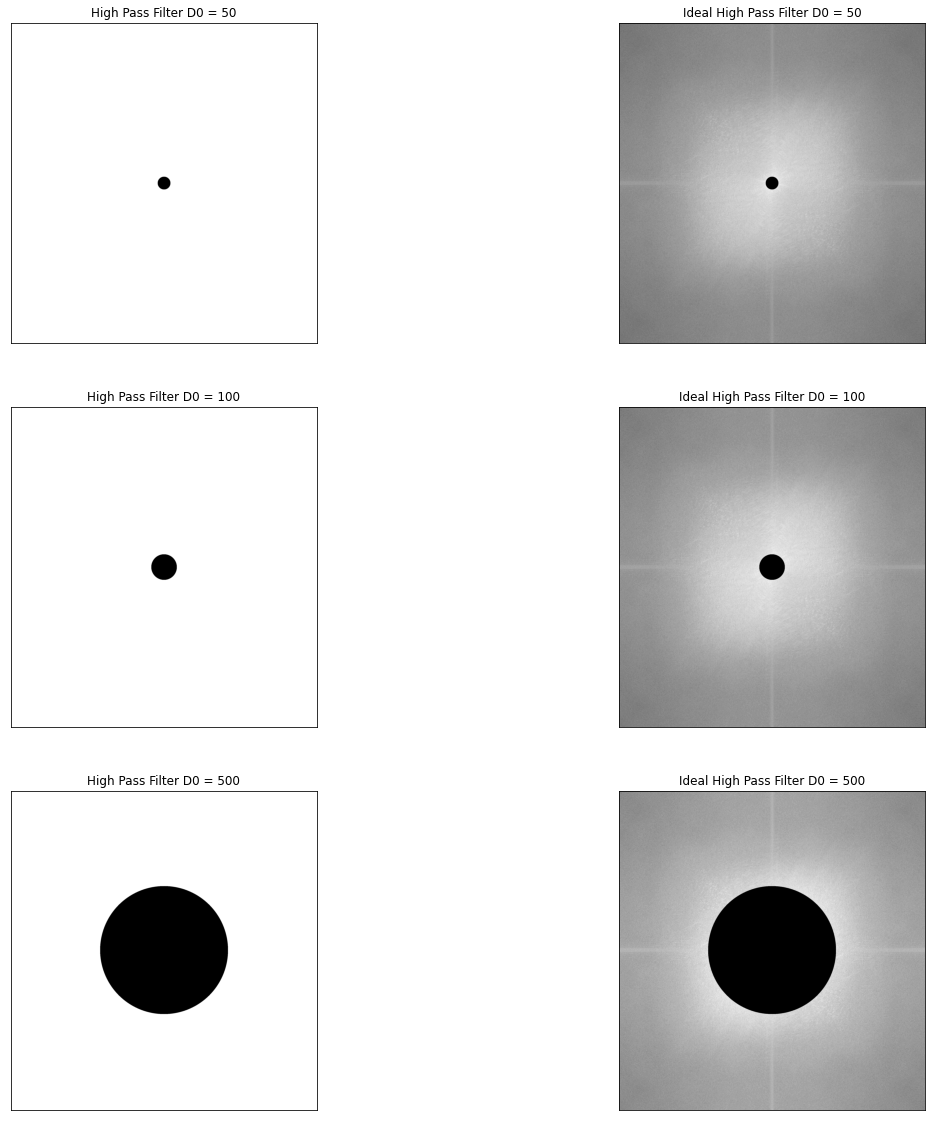

In [35]:
hpf_50 = 1 - lpf_50
hpf_100 = 1 - lpf_100
hpf_500 = 1 - lpf_500

ideal_hpf_50 = f_shift * hpf_50
ideal_hpf_100 = f_shift * hpf_100
ideal_hpf_500 = f_shift * hpf_500

plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.imshow(np.log1p(np.abs(hpf_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("High Pass Filter D0 = 50")

plt.subplot(322)
plt.imshow(np.log1p(np.abs(ideal_hpf_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal High Pass Filter D0 = 50")

plt.subplot(323)
plt.imshow(np.log1p(np.abs(hpf_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("High Pass Filter D0 = 100")

plt.subplot(324)
plt.imshow(np.log1p(np.abs(ideal_hpf_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal High Pass Filter D0 = 100")

plt.subplot(325)
plt.imshow(np.log1p(np.abs(hpf_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("High Pass Filter D0 = 500")

plt.subplot(326)
plt.imshow(np.log1p(np.abs(ideal_hpf_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Ideal High Pass Filter D0 = 500")

Text(0.5, 1.0, 'Inverse High Pass D0 = 500')

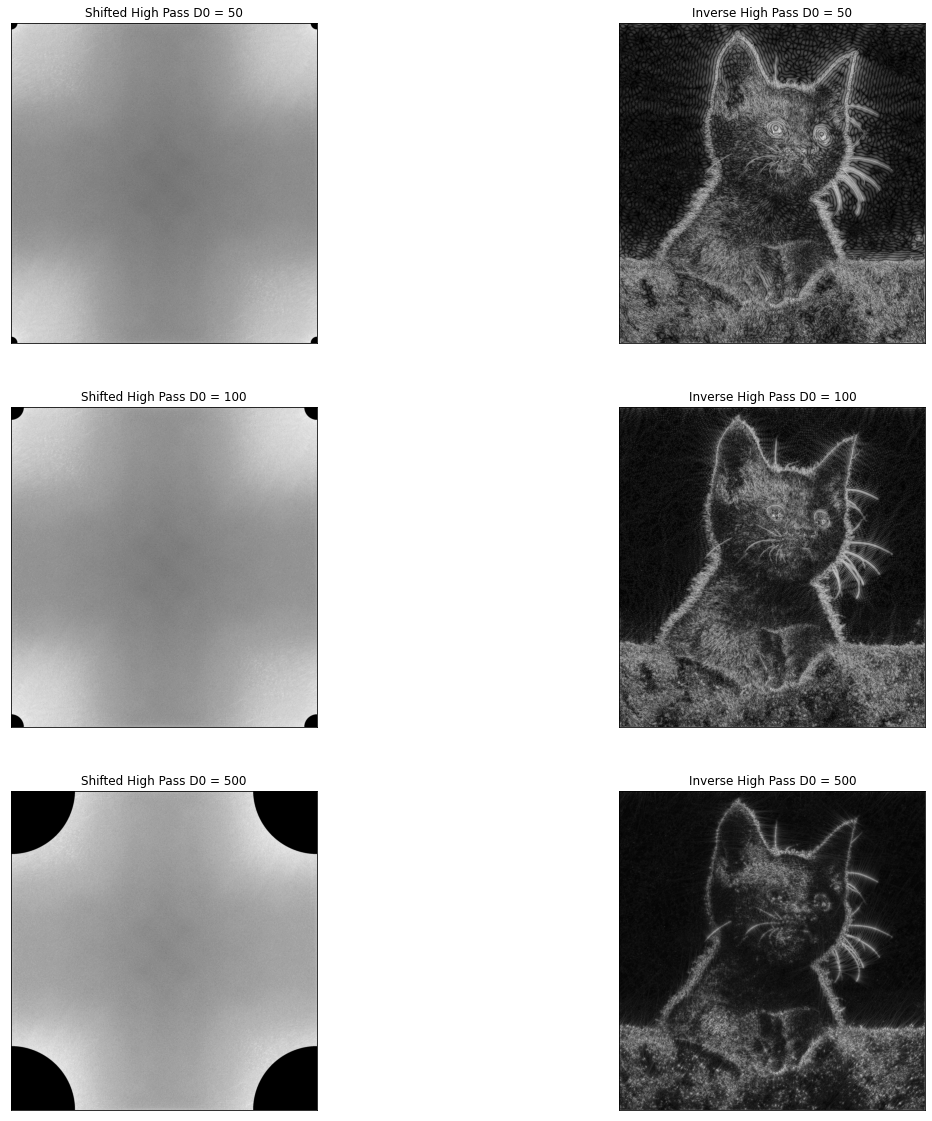

In [40]:
shifted_50 = np.fft.ifftshift(ideal_hpf_50)
shifted_100 = np.fft.ifftshift(ideal_hpf_100)
shifted_500 = np.fft.ifftshift(ideal_hpf_500)

inv_50 = np.fft.ifft2(shifted_50)
inv_100 = np.fft.ifft2(shifted_100)
inv_500 = np.fft.ifft2(shifted_500)

plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.imshow(np.log1p(np.abs(shifted_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Shifted High Pass D0 = 50")

plt.subplot(322)
plt.imshow(np.log1p(np.abs(inv_50)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse High Pass D0 = 50")

plt.subplot(323)
plt.imshow(np.log1p(np.abs(shifted_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Shifted High Pass D0 = 100")

plt.subplot(324)
plt.imshow(np.log1p(np.abs(inv_100)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse High Pass D0 = 100")

plt.subplot(325)
plt.imshow(np.log1p(np.abs(shifted_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Shifted High Pass D0 = 500")

plt.subplot(326)
plt.imshow(np.log1p(np.abs(inv_500)), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Inverse High Pass D0 = 500")